In [1]:
import os
import numpy as np
caffe_root = '/home/flathead/bitbucket/mycaffe/'
os.chdir('../../')
import sys
sys.path.insert(0, 'python')
import caffe

In [2]:
from pylab import *
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [4]:
caffe.set_mode_gpu()
caffe.set_device(0)

In [5]:
solver = caffe.SGDSolver('examples/mnist/test/lenet_solver.prototxt')

In [6]:
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

[('data', (64, 1, 28, 28)),
 ('label', (64,)),
 ('conv1', (64, 20, 24, 24)),
 ('pool1', (64, 20, 12, 12)),
 ('conv2', (64, 50, 8, 8)),
 ('pool2', (64, 50, 4, 4)),
 ('ip2', (64, 500)),
 ('ip3', (64, 10)),
 ('loss', ())]

In [7]:
[(k, v[0].data.shape) for k, v in solver.net.params.items()]

[('conv1', (20, 1, 5, 5)),
 ('conv2', (50, 20, 5, 5)),
 ('ip2', (500, 800)),
 ('ip3', (10, 500))]

In [8]:
solver.test_nets[0].forward()

{'accuracy': array(0.10000000149011612, dtype=float32),
 'loss': array(2.346461296081543, dtype=float32)}

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:5616: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 500 x 800)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:5616: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 10 x 500)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


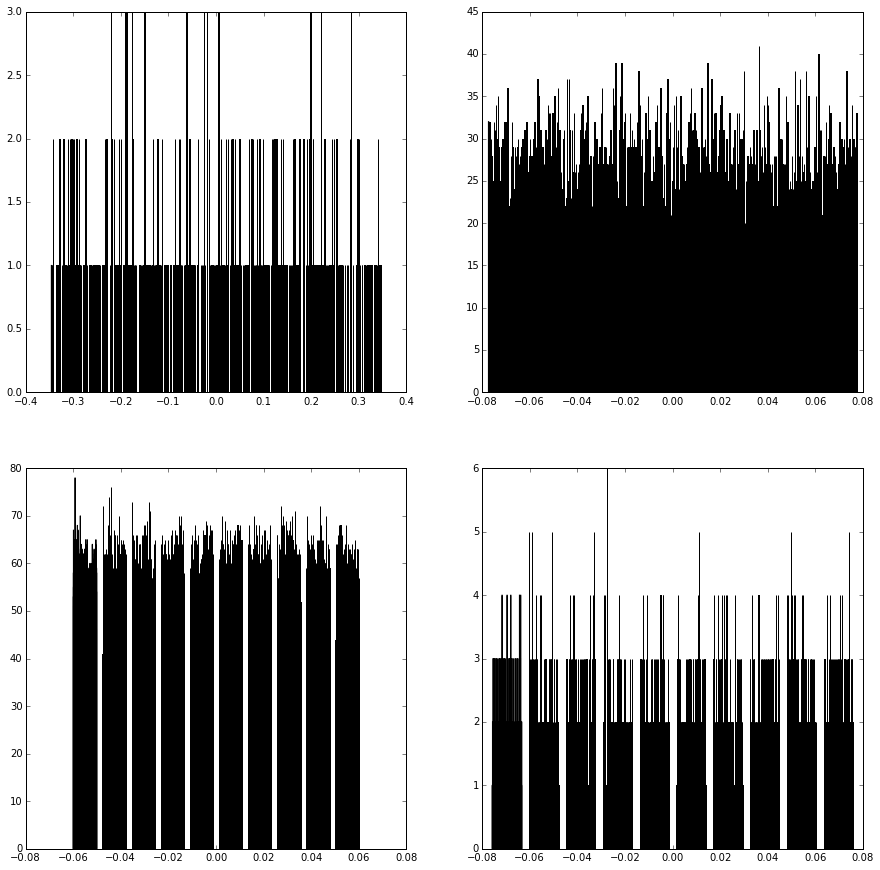

In [9]:
plt.figure(figsize=(15, 15))

feat1 = solver.net.params['conv1'][0].data
feat2 = solver.net.params['conv2'][0].data
#feat3 = net1.params['ip1'][0].data
feat3 = solver.net.params['ip2'][0].data
feat4 = solver.net.params['ip3'][0].data

plt.subplot(2, 2, 1)
#plt.hist(train_net.params['ip1'][0].data)
plt.hist(feat1.flat, bins = 1000)
#plt.title("ip1_weight")

#plt.xlabel("weight")
plt.subplot(2, 2, 2)
#plt.hist(train_net.params['ip2'][0].data)
plt.hist(feat2.flat, bins = 1000)
#plt.title("ip2_weight")

plt.subplot(2, 2, 3)
#plt.hist(train_net.params['ip3'][0].data)
plt.hist(feat3)
#plt.title("ip3_weight")

plt.subplot(2, 2, 4)
#plt.hist(train_net.params['ip4'][0].data)
plt.hist(feat4)
#plt.title("ip4_weight")

plt.show()

In [10]:
std_feat1 = feat1.std()
mean_feat1 = feat1.mean()
print "std_feat1 = ", std_feat1
print "mean_feat1 = ", mean_feat1
std_feat2 = feat2.std()
mean_feat2 = feat2.mean()
print "std_feat2 = ", std_feat2
print "mean_feat2 = ", mean_feat2
std_feat3 = feat3.std()
mean_feat3 = feat3.mean()
print "std_feat3 = ", std_feat3
print "mean_feat3 = ", mean_feat3
std_feat4 = feat4.std()
mean_feat4 = feat4.mean()
print "std_feat4 = ", std_feat4
print "mean_feat4 = ", mean_feat4

std_feat1 =  0.197356
mean_feat1 =  0.000161844
std_feat2 =  0.04474
mean_feat2 =  -0.000495673
std_feat3 =  0.0353402
mean_feat3 =  1.42049e-06
std_feat4 =  0.0451807
mean_feat4 =  0.00110718


In [12]:
%%time
niter = 10000
test_interval = 500
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

for it in range(niter):
    solver.step(1)
    
    train_loss[it] = solver.net.blobs['loss'].data
    
    solver.test_nets[0].forward(start='conv1')
    output[it] = solver.test_nets[0].blobs['ip3'].data[:8]
    
    if it % test_interval == 0:
        print 'iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['ip3'].data.argmax(1) == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

iteration 0 testing...
iteration 500 testing...
iteration 1000 testing...
iteration 1500 testing...
iteration 2000 testing...
iteration 2500 testing...
iteration 3000 testing...
iteration 3500 testing...
iteration 4000 testing...
iteration 4500 testing...
iteration 5000 testing...
iteration 5500 testing...
iteration 6000 testing...
iteration 6500 testing...
iteration 7000 testing...
iteration 7500 testing...
iteration 8000 testing...
iteration 8500 testing...
iteration 9000 testing...
iteration 9500 testing...
iteration 10000 testing...
iteration 10500 testing...
iteration 11000 testing...
iteration 11500 testing...
iteration 12000 testing...
iteration 12500 testing...
iteration 13000 testing...
iteration 13500 testing...
iteration 14000 testing...
iteration 14500 testing...
iteration 15000 testing...
iteration 15500 testing...
iteration 16000 testing...
iteration 16500 testing...
iteration 17000 testing...
iteration 17500 testing...
iteration 18000 testing...
iteration 18500 testing..

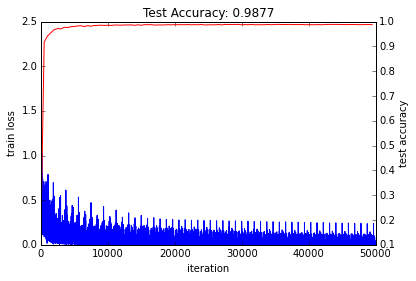

In [13]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.4f}'.format(test_acc[-1]))

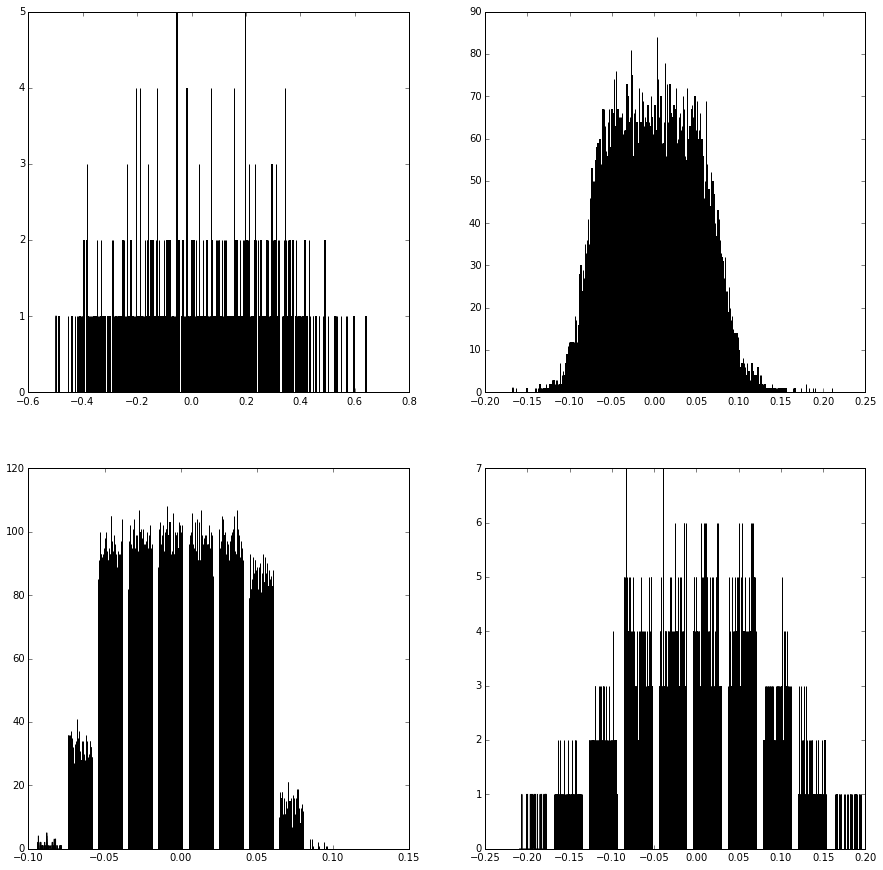

In [14]:
plt.figure(figsize=(15, 15))

feat1 = solver.net.params['conv1'][0].data
feat2 = solver.net.params['conv2'][0].data
#feat3 = net1.params['ip1'][0].data
feat3 = solver.net.params['ip2'][0].data
feat4 = solver.net.params['ip3'][0].data

plt.subplot(2, 2, 1)
#plt.hist(train_net.params['ip1'][0].data)
plt.hist(feat1.flat, bins = 1000)
#plt.title("ip1_weight")

#plt.xlabel("weight")
plt.subplot(2, 2, 2)
#plt.hist(train_net.params['ip2'][0].data)
plt.hist(feat2.flat, bins = 1000)
#plt.title("ip2_weight")

plt.subplot(2, 2, 3)
#plt.hist(train_net.params['ip3'][0].data)
plt.hist(feat3)
#plt.title("ip3_weight")

plt.subplot(2, 2, 4)
#plt.hist(train_net.params['ip4'][0].data)
plt.hist(feat4)
#plt.title("ip4_weight")

plt.show()

In [15]:
std_feat1 = feat1.std()
mean_feat1 = feat1.mean()
print "std_feat1 = ", std_feat1
print "mean_feat1 = ", mean_feat1
std_feat2 = feat2.std()
mean_feat2 = feat2.mean()
print "std_feat2 = ", std_feat2
print "mean_feat2 = ", mean_feat2
std_feat3 = feat3.std()
mean_feat3 = feat3.mean()
print "std_feat3 = ", std_feat3
print "mean_feat3 = ", mean_feat3
std_feat4 = feat4.std()
mean_feat4 = feat4.mean()
print "std_feat4 = ", std_feat4
print "mean_feat4 = ", mean_feat4

std_feat1 =  0.25129
mean_feat1 =  0.0323366
std_feat2 =  0.0503032
mean_feat2 =  -0.000844013
std_feat3 =  0.0358694
mean_feat3 =  0.000181166
std_feat4 =  0.0690768
mean_feat4 =  0.00110751


In [20]:
%%time
niter = 5000
test_interval = 500
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

for it in range(niter):
    solver.step(1)
    
    train_loss[it] = solver.net.blobs['loss'].data
    
    solver.test_nets[0].forward(start='conv1')
    output[it] = solver.test_nets[0].blobs['ip3'].data[:8]
    
    if it % test_interval == 0:
        print 'iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['ip3'].data.argmax(1) == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

iteration 0 testing...
iteration 500 testing...
iteration 1000 testing...
iteration 1500 testing...
iteration 2000 testing...
iteration 2500 testing...
iteration 3000 testing...
iteration 3500 testing...
iteration 4000 testing...
iteration 4500 testing...
CPU times: user 1min 5s, sys: 11.7 s, total: 1min 17s
Wall time: 1min 8s


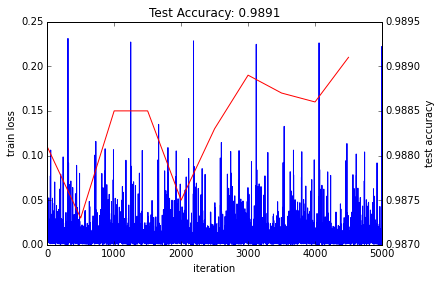

In [21]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.4f}'.format(test_acc[-1]))

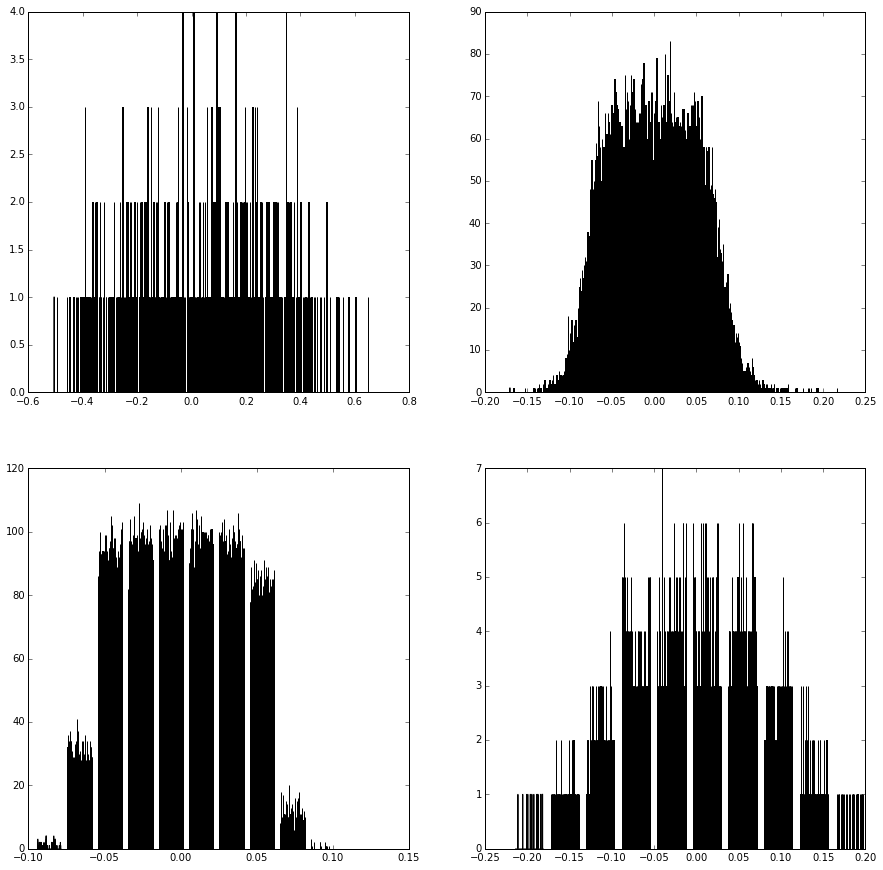

In [22]:
plt.figure(figsize=(15, 15))

feat1 = solver.net.params['conv1'][0].data
feat2 = solver.net.params['conv2'][0].data
#feat3 = net1.params['ip1'][0].data
feat3 = solver.net.params['ip2'][0].data
feat4 = solver.net.params['ip3'][0].data

plt.subplot(2, 2, 1)
#plt.hist(train_net.params['ip1'][0].data)
plt.hist(feat1.flat, bins = 1000)
#plt.title("ip1_weight")

#plt.xlabel("weight")
plt.subplot(2, 2, 2)
#plt.hist(train_net.params['ip2'][0].data)
plt.hist(feat2.flat, bins = 1000)
#plt.title("ip2_weight")

plt.subplot(2, 2, 3)
#plt.hist(train_net.params['ip3'][0].data)
plt.hist(feat3)
#plt.title("ip3_weight")

plt.subplot(2, 2, 4)
#plt.hist(train_net.params['ip4'][0].data)
plt.hist(feat4)
#plt.title("ip4_weight")

plt.show()

In [23]:
std_feat1 = feat1.std()
mean_feat1 = feat1.mean()
print "std_feat1 = ", std_feat1
print "mean_feat1 = ", mean_feat1
std_feat2 = feat2.std()
mean_feat2 = feat2.mean()
print "std_feat2 = ", std_feat2
print "mean_feat2 = ", mean_feat2
std_feat3 = feat3.std()
mean_feat3 = feat3.mean()
print "std_feat3 = ", std_feat3
print "mean_feat3 = ", mean_feat3
std_feat4 = feat4.std()
mean_feat4 = feat4.mean()
print "std_feat4 = ", std_feat4
print "mean_feat4 = ", mean_feat4

std_feat1 =  0.253604
mean_feat1 =  0.0333972
std_feat2 =  0.0505533
mean_feat2 =  -0.000855414
std_feat3 =  0.0358929
mean_feat3 =  0.000181097
std_feat4 =  0.0699914
mean_feat4 =  0.00110763
